In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
df

C:\Users\zeesh\AppData\Local\Temp\ipykernel_28968\449207997.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df= pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])


,Date,Minimum_Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8
...,...,...
3645,1990-12-27,14
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
df.shape[0]

3650

In [6]:
df.head()

,Date,Minimum_Temp
0,1981-01-01,20.7
1,1981-02-01,17.9
2,1981-03-01,18.8
3,1981-04-01,14.6
4,1981-05-01,15.8


In [7]:
train, test= df.Minimum_Temp[:df.shape[0]-1000], df.Minimum_Temp[df.shape[0]-1000:]

In [8]:
train.shape, test.shape

((2650,), (1000,))

## Fitting Auto PyCaret ML forecasting

In [193]:
# import seaborn as sns
# import pandas as pd

# # Get the list of available dataset names
# dataset_names = sns.get_dataset_names()

# # Create an empty DataFrame
# dataset_info_df = pd.DataFrame(columns=["Dataset Name", "Column Names"])

# # Populate the DataFrame with information about each dataset
# for dataset_name in dataset_names:
#     # Load the dataset
#     dataset = sns.load_dataset(dataset_name)

#     # Extract column names
#     column_names = list(dataset.columns)

#     # Add a row to the DataFrame
#     dataset_info_df = dataset_info_df.append({
#         "Dataset Name": dataset_name,
#         "Column Names": column_names
#     }, ignore_index=True)

# # Display the DataFrame
# dataset_info_df



In [195]:
import pickle
import mlflow
import pandas as pd
from pycaret.time_series import *
from pycaret.datasets import get_data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = get_data('pycaret_downloads')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)



,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [198]:
import plotly.express as px

dt = get_data('pycaret_downloads')
dt['Date'] = pd.to_datetime(dt['Date'])
df_test= dt.copy()

fig = px.line(df_test, x='Date', y='Total', markers=True)
# Update the marker color
fig.update_traces(marker=dict(color='red'))

# Update the layout to include zooming functionality
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1d", step="day", stepmode="backward"),
                dict(count=7, label="1w", step="day", stepmode="backward"),
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

,Date,Total
0,7/8/2021,3773
1,7/9/2021,3172
2,7/10/2021,2079
3,7/11/2021,2725
4,7/12/2021,4542


In [199]:
# Log best model and PyCaret artifacts to MLflow
mlflow.autolog()
with mlflow.start_run():
    # Set up PyCaret
    s = setup(data, fh=12, session_id=123)
    # Log experiment to MLflow
    mlflow.set_experiment("Pycaret_experiment")
    # Train models
    check_stats()
    
    best = compare_models()
    # Log PyCaret experiment
    mlflow.log_params({'fh': 12, 'session_id': 123})


2024/03/07 10:39:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for lightgbm.
2024/03/07 10:39:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.


2024/03/07 10:39:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/03/07 10:39:16 INFO mlflow.tracking.fluent: Autologging successfully enabled for xgboost.


,Description,Value
0,session_id,123
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


2024/03/07 10:41:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during statsmodels autologging: Changing param values is not allowed. Param with key='method' was already logged with value='qr' for run ID='82e1c3e393224fc0b7358e3bcd388809'. Attempted logging new value 'pinv'.
2024/03/07 10:41:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during statsmodels autologging: Changing param values is not allowed. Param with key='method' was already logged with value='qr' for run ID='82e1c3e393224fc0b7358e3bcd388809'. Attempted logging new value 'pinv'.
2024/03/07 10:41:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during statsmodels autologging: Changing param values is not allowed. Param with key='method' was already logged with value='qr' for run ID='82e1c3e393224fc0b7358e3bcd388809'. Attempted logging new value 'pinv'.
2024/03/07 10:41:53 WARNING mlflow.utils.autologging_utils: Encountered unexpected error during s

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2803,1.1409,736.2266,898.0371,0.1556,0.1523,0.7302,0.0600
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.2967
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3698,1.3083,738.8352,922.5881,0.1326,0.1401,0.7353,0.2033
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.9467
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.7800
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.1933
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.5200
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,1.5567
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4680,1.3076,795.8164,936.3670,0.1531,0.1538,0.7309,2.0000
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,1.4741,1.3402,804.2119,968.4707,0.1520,0.1547,0.7141,0.2200


In [250]:
check_stats()
# models_list = get_all_models()
# models_list

2024/03/07 12:21:39 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '118014126dde4f83bb53055264929dfc', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2024/03/07 12:21:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2234fad15ade4c1a8d25cc30fe1d47a4', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2024/03/07 12:22:04 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'd9748be1ad1743b5830a3a992309712e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current statsmodels workflow
2024/03/07 12:22:11 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '83c98ba0fd1f4d609581c76e07a2035d', which will track hyperparameters, performance metrics, model artifacts, a

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,90.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,4960.366667
3,Summary,Statistics,Transformed,Median,,4776.5
4,Summary,Statistics,Transformed,Standard Deviation,,1939.000116
5,Summary,Statistics,Transformed,Variance,,3759721.448315
6,Summary,Statistics,Transformed,Kurtosis,,-0.920113
7,Summary,Statistics,Transformed,Skewness,,0.22622
8,Summary,Statistics,Transformed,# Distinct Values,,89.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932


In [ ]:
# final_model = pull(best)
# final_model.fit()

In [200]:
best.get_params()

{'deseasonalize': True, 'initial_level': None, 'sp': 7}

In [ ]:
# best_mae_models_top3 = compare_models(sort = 'R2', n_select = 3)
# list of top 3 models by MAE
# best_mae_models_top3


In [201]:
arima=create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.5825,2.8398,1181.7587,1579.3725,0.2065,0.2419,0.3673
1,2021-08-30,0.7835,0.6025,505.7363,583.4328,0.0913,0.0947,0.8690
2,2021-09-11,1.4576,1.2129,904.2588,1104.9126,0.1336,0.1465,0.6375
Mean,NaT,1.6079,1.5517,863.9179,1089.2393,0.1438,0.1610,0.6246
SD,NaT,0.7421,0.9443,277.4552,406.7417,0.0476,0.0609,0.2050


In [202]:
theta=create_model('theta')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,1.2785,1.3734,585.0244,763.8488,0.1576,0.1421,0.8520
1,2021-08-30,1.3553,1.1081,874.7426,1073.0322,0.1630,0.1787,0.5568
2,2021-09-11,1.2072,0.9410,748.9128,857.2304,0.1462,0.1362,0.7818
Mean,NaT,1.2803,1.1409,736.2266,898.0371,0.1556,0.1523,0.7302
SD,NaT,0.0605,0.1780,118.6166,129.4797,0.0070,0.0188,0.1259


In [203]:
tuned_theta= tune_model(theta)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:45:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Theta Forecaster


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,1.2785,1.3734,585.0244,763.8488,0.1576,0.1421,0.8520
1,2021-08-30,1.3553,1.1081,874.7426,1073.0322,0.1630,0.1787,0.5568
2,2021-09-11,1.2072,0.9410,748.9128,857.2304,0.1462,0.1362,0.7818
Mean,NaT,1.2803,1.1409,736.2266,898.0371,0.1556,0.1523,0.7302
SD,NaT,0.0605,0.1780,118.6166,129.4797,0.0070,0.0188,0.1259


Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.1s finished


In [204]:
plot_model(plot='train_test_split')

In [205]:
plot_model(plot='cv')

In [173]:
plot_model(plot='decomp')

In [206]:
plot_model(plot='decomp', data_kwargs={'type':'Multiplicative'})

In [174]:
plot_model(plot='decomp', data_kwargs={'sesonal_period':24})

In [175]:
plot_model(plot='acf')

In [176]:
plot_model(plot='pacf')


In [207]:
plot_model(best, plot = 'diagnostics')


In [208]:
# plot forecast
plot_model(best, plot = 'forecast')

In [210]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 36})

In [212]:
plot_model(estimator=tuned_theta, data_kwargs={"fh":36})
# plot_model(estimator=naive, data_kwargs={"fh":36})
# plot_model([theta, tuned_theta], data_kwargs={"labels": ["Baseline", "Tuned"]})

In [ ]:
# residuals plot
# plot_model(best, plot = 'insample')

In [213]:
# residuals plot
plot_model(best, plot = 'residuals')

In [214]:
# generate forecast for 36 period in future
predict_model(best, fh = 36)

,y_pred
2021-09-24,7111.4964
2021-09-25,3578.8096
2021-09-26,4123.7043
2021-09-27,7779.4459
2021-09-28,8493.7955
2021-09-29,8468.0194
2021-09-30,8467.1125
2021-10-01,7243.3989
2021-10-02,3645.0132
2021-10-03,4199.7866


### MLflow tracking

In [229]:
import pandas as pd
import mlflow.tracking

# Replace with your experiment ID
experiment_id = "452510640551172341"

# Get all runs within the experiment
client = mlflow.tracking.MlflowClient()
runs = client.search_runs(experiment_ids=experiment_id)
# runs
# # Create an empty dataframe
df_runs = pd.DataFrame(columns=["Run ID", "Model Name"])

# Iterate through each run and extract model name and metrics
for run in runs:
    run_data = client.get_run(run.info.run_id)
    model_name = run_data.data.params.get("model_name")  # Assuming "model_name" is logged as a parameter
    metrics = run_data.data.metrics  # Capture all logged metrics

    # Append the run data to the dataframe
    row_data = {"Run ID": run.info.run_id, "Model Name": model_name}
    for metric_name, metric_value in metrics.items():
        row_data[metric_name] = metric_value
        
    df_runs = df_runs.append(row_data, ignore_index=True)

# Replace missing metric values with "NA"
df_runs = df_runs.fillna("NA")

# Print the dataframe
display(df_runs)


,Run ID,Model Name,aic,bic,df_model,df_resid,llf,scale,centered_tss,condition_number,...,mse_total,rsquared,rsquared_adj,ssr,training_mean_absolute_error,training_mean_squared_error,training_r2_score,training_root_mean_squared_error,training_score,uncentered_tss
0,ac698dd58c214b3a8304dec795834288,NA,1022.437956,1027.151374,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,15e8c613deea40b4be1f81fd0e454c43,NA,1022.437956,1027.151374,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,a5f824ea23a34aac91494858de693559,NA,1022.437956,1027.151374,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,9e492e3cf88941e7a33deafe3a3b5319,NA,1148.944684,1155.732723,3.0,inf,-571.472342,1.0,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,82e1c3e393224fc0b7358e3bcd388809,NA,1200.569066,1207.481261,3.0,71.0,-597.284533,625516.738194,166258383.621622,2.614898,...,2247086.72973,0.732917,0.721632,44411688.411789,1241.675546,2665488.431511,0.0,1632.632363,0.0,166284418.0


In [230]:
import mlflow

# Replace with your experiment ID
experiment_id = "452510640551172341"

# Specify the metric to evaluate the best run
metric = "rsquared"

# Fetch the best run based on the given metric
best_run = mlflow.search_runs(
    experiment_ids=experiment_id,
    order_by=[f"metric.{metric} DESC"],
    max_results=1
).iloc[0]
best_run

run_id                                                       82e1c3e393224fc0b7358e3bcd388809
experiment_id                                                              452510640551172341
status                                                                               FINISHED
artifact_uri                                file:///c:/Users/zeesh/OneDrive%20-%20ORMAE/Do...
start_time                                                   2024-03-07 05:09:16.990000+00:00
end_time                                                     2024-03-07 05:13:13.544000+00:00
metrics.training_root_mean_squared_error                                          1632.632363
metrics.centered_tss                                                         166258383.621622
metrics.training_mean_absolute_error                                              1241.675546
metrics.llf                                                                       -597.284533
metrics.mse_resid                                           

In [231]:
run_id=best_run.run_id
run_id

'82e1c3e393224fc0b7358e3bcd388809'

## Register the model

In [236]:
import time
model_name='PyCaret_model'
model_path=best_run.artifact_uri
mlflow.register_model(f"{model_path}/model",model_name)
time.sleep(15)

Registered model 'PyCaret_model' already exists. Creating a new version of this model...
Created version '2' of model 'PyCaret_model'.


### Testing models

In [233]:
test_data=data.head(10)
test_data

,Total
Date,
2021-07-08,3773
2021-07-09,3172
2021-07-10,2079
2021-07-11,2725
2021-07-12,4542
2021-07-13,3795
2021-07-14,3941
2021-07-15,4064
2021-07-16,3474


In [243]:
# import mlflow
# from pycaret.datasets import get_data
# #...data preparation and setup
# model_name='PyCaret_model'
# logged_model=r'C:\Users\zeesh\OneDrive - ORMAE\Documents\Projects\Self_Programming_Practice\Zee_github_projects\sales_forecasting\Time_Series_Forecasting\mlruns\452510640551172341\82e1c3e393224fc0b7358e3bcd388809\artifacts\model'

# # logged_model = 'runs:/xx/model'

# # Load model as a PyFuncModel.
# loaded_model = mlflow.pyfunc.load_model(logged_model)

# # Predict on a Pandas DataFrame.
# import pandas as pd
# loaded_model.predict(test_data)

In [247]:
import pickle
import pandas as pd

# Load the saved model from the pickle file
model_path=r'C:\Users\zeesh\OneDrive - ORMAE\Documents\Projects\Self_Programming_Practice\Zee_github_projects\sales_forecasting\Time_Series_Forecasting\mlruns\452510640551172341\82e1c3e393224fc0b7358e3bcd388809\artifacts\model\model.pkl'
with open(model_path, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Make predictions using the loaded model
predictions = loaded_model.predict(test_data)

# Display the predictions
predictions


array([57.29213483, 57.29213483, 57.29213483, 57.29213483, 57.29213483,
       57.29213483, 57.29213483, 57.29213483, 57.29213483, 57.29213483])

In [256]:
# from pyngrok import ngrok

# # Terminate any existing ngrok tunnels
# ngrok.kill()

# # Replace NGROK_AUTH_TOKEN with your actual Ngrok authentication token
# NGROK_AUTH_TOKEN = ""
# ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# # Start a new ngrok tunnel and bind it to port 5000 for MLflow Tracking UI
# ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)

# # Print the public URL of the MLflow Tracking UI
# print("MLflow Tracking UI:", ngrok_tunnel.public_url)


t=2024-03-07T12:43:43+0530 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=9db9df70b0b5 err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
t=2024-03-07T12:43:43+0530 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
t=2024-03-07T12:43:43+0530 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-autht

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

# Fitting AR Model

c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with 

Root Mean Squared Error (RMSE): 3.9514144074198425


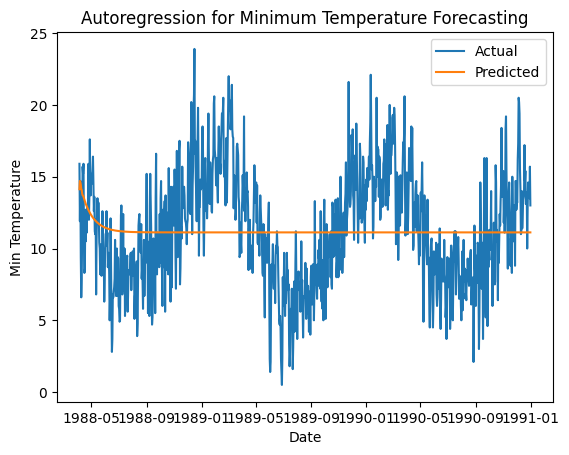

In [92]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
## Importing dataset

data= pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date']= pd.to_datetime(data['Date'],format='%d-%m-%Y')
# data.dropna(inplace= True)
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:data.shape[0]-1000]  # Use all data except the last 12 months for training
test_data = data.iloc[data.shape[0]-1000:]   # Use the last 12 months for testing

# Fit the autoregressive model
lag = 7  # Number of lag variables to include
model = AutoReg(train_data, lags=lag)
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data['Minimum_Temp'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('Autoregression for Minimum Temperature Forecasting')
plt.legend()
plt.show()

# Moving Average temperature

c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer ind

Root Mean Squared Error (RMSE): 3.9469950564858443


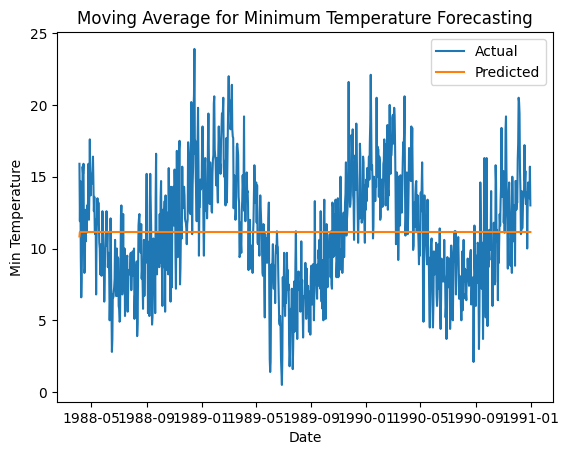

In [97]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:data.shape[0] - 1000]  # Use all data except the last 1000 rows for training
test_data = data.iloc[data.shape[0] - 1000:]  # Use the last 1000 rows for testing

# Fit the moving average model
order = (0, 0, 1)  # Order of the ARIMA model: (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data['Minimum_Temp'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('Moving Average for Minimum Temperature Forecasting')
plt.legend()
plt.show()


# Sarimax model

c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a suppo

Root Mean Squared Error (RMSE): 5.352825836916293


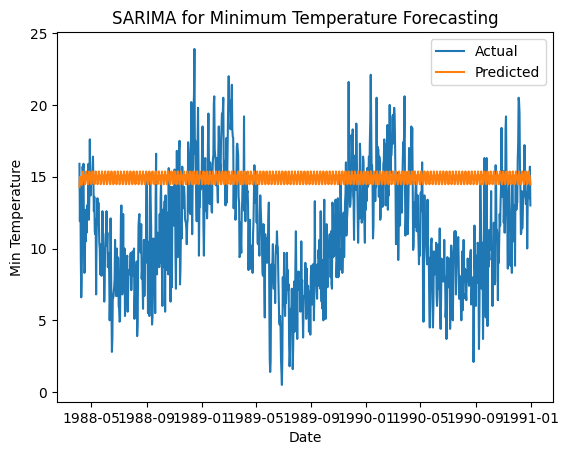

In [105]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:data.shape[0] - 1000]  # Use all data except the last 1000 rows for training
test_data = data.iloc[data.shape[0] - 1000:]  # Use the last 1000 rows for testing

# Fit the SARIMA model
order = (1, 0, 1)  # Order of the non-seasonal ARIMA model: (p, d, q)
seasonal_order = (0, 1, 1, 7)  # Order of the seasonal ARIMA model: (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
plt.plot(test_data.index, test_data['Minimum_Temp'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('SARIMA for Minimum Temperature Forecasting')
plt.legend()
plt.show()


# Auto Arima Model

c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error (RMSE): 4.151052124894976


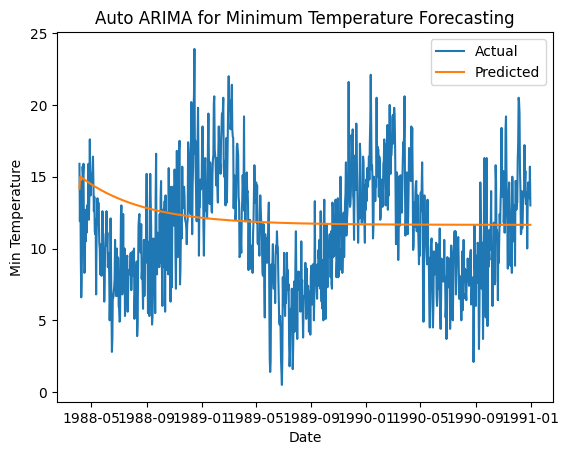

In [100]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:data.shape[0] - 1000]  # Use all data except the last 1000 rows for training
test_data = data.iloc[data.shape[0] - 1000:]  # Use the last 1000 rows for testing

# Fit the auto ARIMA model
model = auto_arima(train_data, suppress_warnings=True)

# Make predictions for the test set
predictions = model.predict(n_periods=len(test_data))

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt

plt.plot(test_data.index, test_data['Minimum_Temp'], label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('Auto ARIMA for Minimum Temperature Forecasting')
plt.legend()
plt.show()


# Next two month forecasting using Auto-Arima

c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error (RMSE): 3.6990975675905706


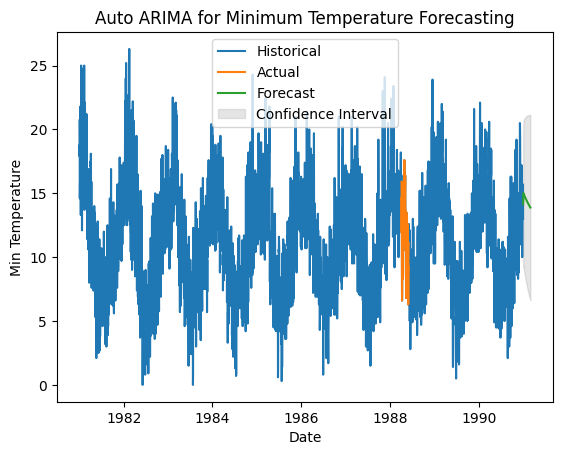

In [107]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:data.shape[0] - 1000]  # Use all data except the last 1000 rows for training
test_data = data.iloc[data.shape[0] - 1000:]  # Use the last 1000 rows for testing

# Fit the auto ARIMA model
model = auto_arima(train_data, suppress_warnings=True)

# Forecast for the next two months
n_periods = 2 * 30  # Two months with 30 days each
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create date index for the forecast period
forecast_dates = pd.date_range(start=test_data.index[-1] + pd.DateOffset(days=1), periods=n_periods, freq='D')

# Truncate the test_data to match the length of the forecast
test_data_truncated = test_data[:len(forecast)]

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data_truncated, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual, predicted values, and confidence intervals
plt.plot(data.index, data['Minimum_Temp'], label='Historical')
plt.plot(test_data_truncated.index, test_data_truncated['Minimum_Temp'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('Auto ARIMA for Minimum Temperature Forecasting')
plt.legend()
plt.show()


c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error (RMSE): 3.6964060344888754


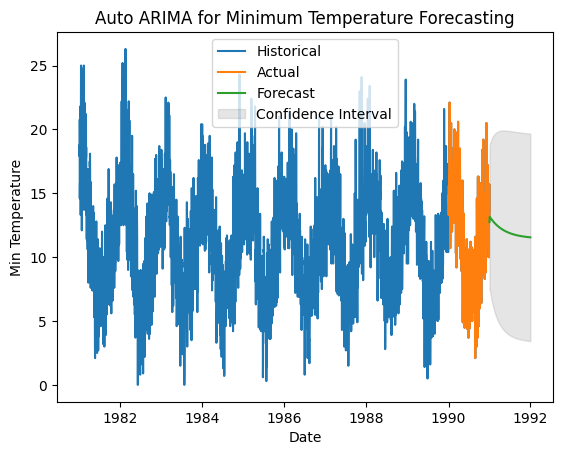

In [112]:
import pandas as pd
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:-365]  # Use all data except the last year for training
test_data = data.iloc[-365:]  # Use the last year for testing

# Fit the auto ARIMA model
model = auto_arima(train_data, suppress_warnings=True)

# Forecast for the next year
n_periods = 365  # Forecast for the next 365 days
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create date index for the forecast period
forecast_dates = pd.date_range(start=test_data.index[-1] + pd.DateOffset(days=1), periods=n_periods, freq='D')

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, forecast))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual, predicted values, and confidence intervals
plt.plot(data.index, data['Minimum_Temp'], label='Historical')
plt.plot(test_data.index, test_data['Minimum_Temp'], label='Actual')
plt.plot(forecast_dates, forecast, label='Forecast')
plt.fill_between(forecast_dates, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('Auto ARIMA for Minimum Temperature Forecasting')
plt.legend()
plt.show()


# LSTM model

Epoch 1/50
83/83 [==============================] - 5s 19ms/step - loss: 0.0332 - val_loss: 0.0111
Epoch 2/50
83/83 [==============================] - 0s 6ms/step - loss: 0.0123 - val_loss: 0.0106
Epoch 3/50
83/83 [==============================] - 0s 6ms/step - loss: 0.0120 - val_loss: 0.0103
Epoch 4/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0118 - val_loss: 0.0102
Epoch 5/50
83/83 [==============================] - 1s 6ms/step - loss: 0.0116 - val_loss: 0.0101
Epoch 6/50
83/83 [==============================] - 0s 5ms/step - loss: 0.0113 - val_loss: 0.0098
Epoch 7/50
83/83 [==============================] - 1s 7ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 8/50
83/83 [==============================] - 0s 6ms/step - loss: 0.0109 - val_loss: 0.0094
Epoch 9/50
83/83 [==============================] - 0s 5ms/step - loss: 0.0106 - val_loss: 0.0093
Epoch 10/50
83/83 [==============================] - 0s 6ms/step - loss: 0.0104 - val_loss: 0.0087
Epoch 11/50
83/83 

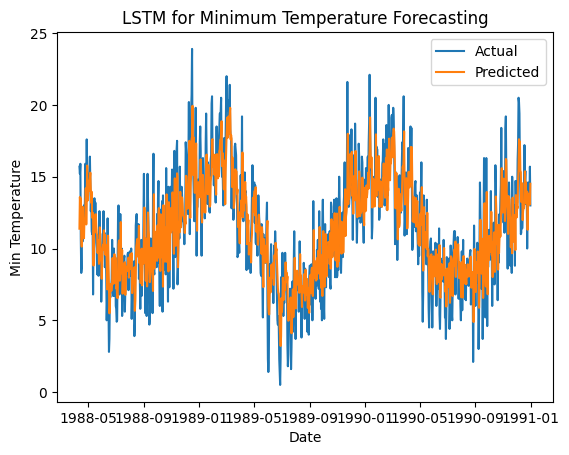

In [101]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:data.shape[0] - 1000]  # Use all data except the last 1000 rows for training
test_data = data.iloc[data.shape[0] - 1000:]  # Use the last 1000 rows for testing

# Scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Create input sequences for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Number of previous time steps to use as input

X_train, y_train = create_sequences(train_data_scaled, sequence_length)
X_test, y_test = create_sequences(test_data_scaled, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions for the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data.values[sequence_length:], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values
import matplotlib.pyplot as plt

plt.plot(test_data.index[sequence_length:], test_data['Minimum_Temp'].values[sequence_length:], label='Actual')
plt.plot(test_data.index[sequence_length:], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('LSTM for Minimum Temperature Forecasting')
plt.legend()
plt.show()


# Next two month forecasting using LSTM

Epoch 1/50
114/114 [==============================] - 3s 4ms/step - loss: 0.0234
Epoch 2/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0113
Epoch 3/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0110
Epoch 4/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 5/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0107
Epoch 6/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0103
Epoch 7/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 8/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0099
Epoch 9/50
114/114 [==============================] - 1s 5ms/step - loss: 0.0097
Epoch 10/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 11/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0091
Epoch 12/50
114/114 [==============================] - 0s 4ms/step - loss: 0.0089
Epoch 13/50
114/114 [====

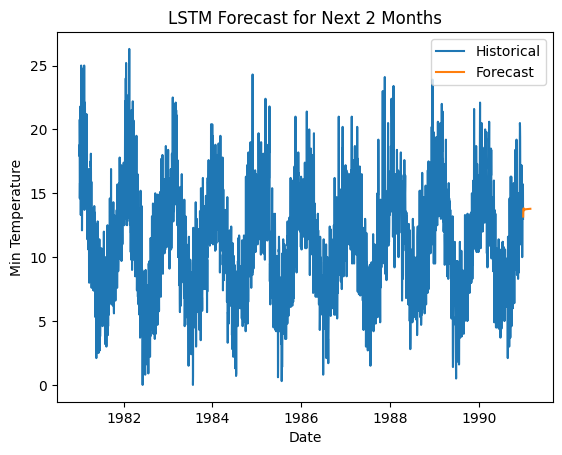

In [103]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create input sequences for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Number of previous time steps to use as input

X, y = create_sequences(scaled_data, sequence_length)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X, y, epochs=50, batch_size=32, callbacks=[early_stopping])

# Forecast the next 2 months
last_sequence = scaled_data[-sequence_length:]
forecasted_data = []
for _ in range(2 * 30):  # Forecast for 2 months (assuming 30 days per month)
    next_sequence = model.predict(last_sequence.reshape(1, sequence_length, 1))
    forecasted_data.append(next_sequence[0])
    last_sequence = np.append(last_sequence[1:], next_sequence[0])

# Inverse scale the forecasted data
forecasted_data = np.array(forecasted_data)
forecasted_data = scaler.inverse_transform(forecasted_data)

# Create date range for the forecasted period
last_date = data.index[-1]
forecasted_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=len(forecasted_data), freq='D')

# Plot the forecasted values
import matplotlib.pyplot as plt

plt.plot(data.index, data['Minimum_Temp'], label='Historical')
plt.plot(forecasted_dates, forecasted_data, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('LSTM Forecast for Next 2 Months')
plt.legend()
plt.show()


Epoch 1/50
91/91 [==============================] - 4s 12ms/step - loss: 0.0283 - val_loss: 0.0103
Epoch 2/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0117 - val_loss: 0.0099
Epoch 3/50
91/91 [==============================] - 0s 5ms/step - loss: 0.0115 - val_loss: 0.0102
Epoch 4/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0114 - val_loss: 0.0094
Epoch 5/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0112 - val_loss: 0.0093
Epoch 6/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0097
Epoch 7/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0108 - val_loss: 0.0095
Epoch 8/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0087
Epoch 9/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.0087
Epoch 10/50
91/91 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0084
Epoch 11/50
91/91 

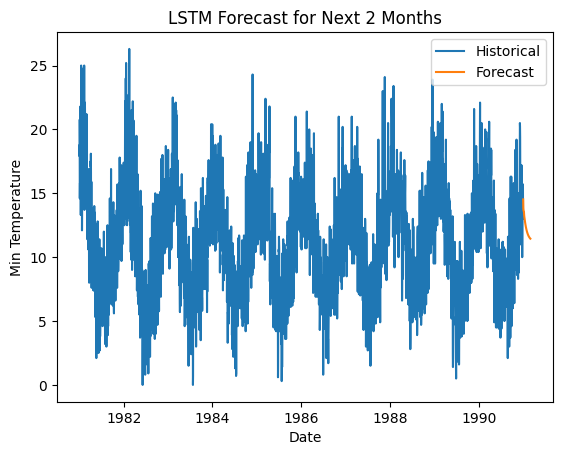

In [104]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create input sequences for LSTM
def create_sequences(data, sequence_length):
    X = []
    y = []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 7  # Number of previous time steps to use as input

X, y = create_sequences(scaled_data, sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, callbacks=[early_stopping], validation_data=(X_test, y_test))

# Forecast the next 2 months
last_sequence = X[-1]
forecasted_data = []
for _ in range(2 * 30):  # Forecast for 2 months (assuming 30 days per month)
    next_sequence = model.predict(last_sequence.reshape(1, sequence_length, 1))
    forecasted_data.append(next_sequence[0])
    last_sequence = np.append(last_sequence[1:], next_sequence[0])

# Inverse scale the forecasted data
forecasted_data = np.array(forecasted_data)
forecasted_data = scaler.inverse_transform(forecasted_data)

# Create date range for the forecasted period
last_date = data.index[-1]
forecasted_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=len(forecasted_data), freq='D')

# Plot the forecasted values
import matplotlib.pyplot as plt

plt.plot(data.index, data['Minimum_Temp'], label='Historical')
plt.plot(forecasted_dates, forecasted_data, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('LSTM Forecast for Next 2 Months')
plt.legend()
plt.show()


In [108]:
data

,Minimum_Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


Epoch 1/50
102/102 [==============================] - 11s 24ms/step - loss: 0.0200
Epoch 2/50
102/102 [==============================] - 2s 24ms/step - loss: 0.0114
Epoch 3/50
102/102 [==============================] - 3s 28ms/step - loss: 0.0112
Epoch 4/50
102/102 [==============================] - 3s 28ms/step - loss: 0.0110
Epoch 5/50
102/102 [==============================] - 3s 28ms/step - loss: 0.0111
Epoch 6/50
102/102 [==============================] - 3s 26ms/step - loss: 0.0107
Epoch 7/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0101
Epoch 8/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0094
Epoch 9/50
102/102 [==============================] - 3s 26ms/step - loss: 0.0090
Epoch 10/50
102/102 [==============================] - 3s 25ms/step - loss: 0.0088
Epoch 11/50
102/102 [==============================] - 3s 27ms/step - loss: 0.0088
Epoch 12/50
102/102 [==============================] - 3s 30ms/step - loss: 0.0087
Epoch 13/50


c:\Users\zeesh\anaconda3\envs\LangChain\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


12/12 [==============================] - 3s 17ms/step
Root Mean Squared Error (RMSE): 2.2598069117107378


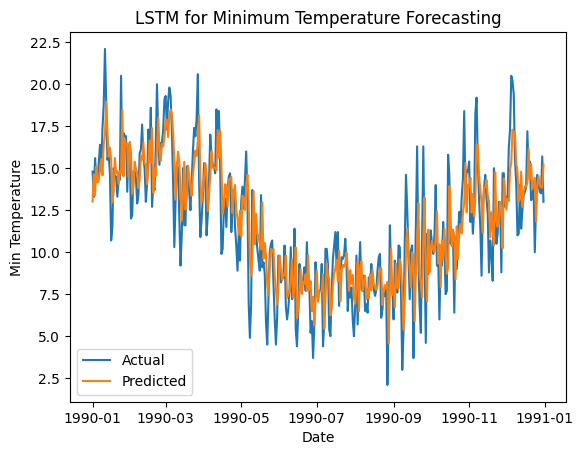

In [120]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.set_index('Date', inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:-365]  # Use all data except the last year for training
test_data = data.iloc[-365:]  # Use the last year for testing

# Scale the data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Prepare the training data
X_train = []
y_train = []
timesteps = 30  # Number of previous time steps to use for forecasting

for i in range(timesteps, len(train_data_scaled)):
    X_train.append(train_data_scaled[i - timesteps:i, 0])
    y_train.append(train_data_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Prepare the test data
inputs = data.iloc[len(data) - len(test_data) - timesteps:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i - timesteps:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions for the test data
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)

# Evaluate the model using Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test_data, predicted))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual and predicted values
plt.plot(test_data.index, test_data['Minimum_Temp'], label='Actual')
plt.plot(test_data.index, predicted, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.title('LSTM for Minimum Temperature Forecasting')
plt.legend()
plt.show()


In [116]:
data

,Minimum_Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


# Prophet forecasting Method

23:10:45 - cmdstanpy - INFO - Chain [1] start processing
23:10:47 - cmdstanpy - INFO - Chain [1] done processing


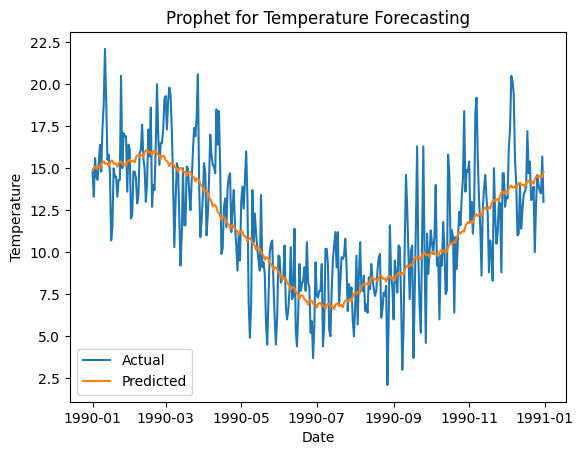

In [131]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp']= pd.to_numeric(data['Minimum_Temp'], errors='coerce')
data.rename(columns={'Date': 'ds', 'Minimum_Temp': 'y'}, inplace=True)
data.dropna(inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:-365]  # Use all data except the last year for training
test_data = data.iloc[-365:]  # Use the last year for testing

# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

# Create future dates for prediction
future_dates = model.make_future_dataframe(periods=len(test_data), freq='D')

# Make predictions
forecast = model.predict(future_dates)

# Extract the forecasted values
predictions = forecast.tail(len(test_data))['yhat'].values

# Plot the actual and predicted values
plt.plot(test_data['ds'], test_data['y'], label='Actual')
plt.plot(test_data['ds'], predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Prophet for Temperature Forecasting')
plt.legend()
plt.show()


# Data Visualization on time 

In [133]:
# Importing dataset
data = pd.read_csv('daily-minimum-temperatures.csv', header=0, parse_dates=[0])
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Minimum_Temp'] = pd.to_numeric(data['Minimum_Temp'], errors='coerce')
# data.set_index('Date', inplace=True)
data.dropna(inplace=True)
data

,Date,Minimum_Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [134]:
# Extract the month, day, and year from the 'Date' column
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Year'] = data['Date'].dt.year

In [135]:
data

,Date,Minimum_Temp,Month,Day,Year
0,1981-01-01,20.7,1,1,1981
1,1981-01-02,17.9,1,2,1981
2,1981-01-03,18.8,1,3,1981
3,1981-01-04,14.6,1,4,1981
4,1981-01-05,15.8,1,5,1981
...,...,...,...,...,...
3645,1990-12-27,14.0,12,27,1990
3646,1990-12-28,13.6,12,28,1990
3647,1990-12-29,13.5,12,29,1990
3648,1990-12-30,15.7,12,30,1990


In [181]:
import seaborn as sns
import altair as alt

# Subplots for all aspect to have better understanding of the pattern

C:\Users\zeesh\AppData\Local\Temp\ipykernel_28096\2485796679.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_28096\2485796679.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_28096\2485796679.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
C:\Users\zeesh\AppData\Local\Temp\ipykernel_28096\2485796679.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


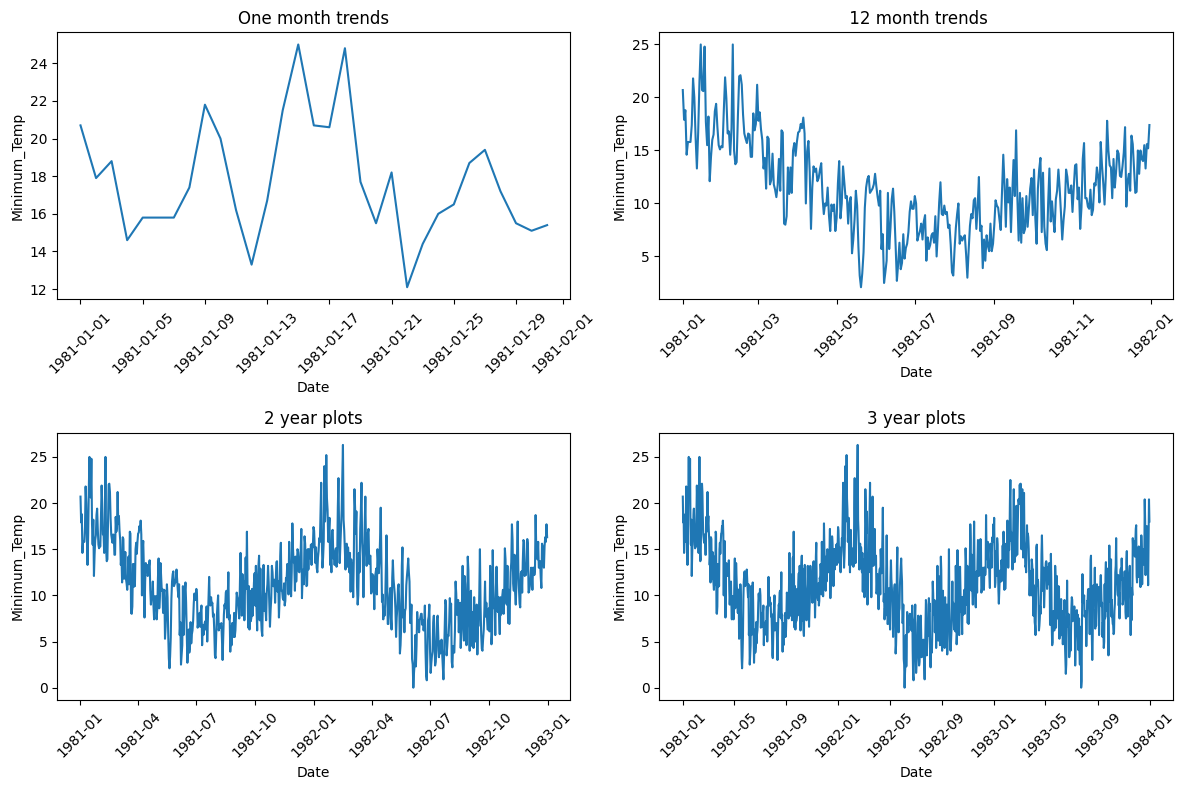

In [178]:
# Create a figure and four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# Plot 1
sns.lineplot(x='Date', y='Minimum_Temp', data=data.query("Year==1981 & Month==1"), ax=axes[0, 0])
axes[0, 0].set_title('One month trends')
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
# Plot 2
sns.lineplot(x='Date', y='Minimum_Temp', data=data.query("Year==1981"), ax=axes[0, 1])
axes[0, 1].set_title(' 12 month trends')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)
# Plot 3
sns.lineplot(x='Date', y='Minimum_Temp', data=data.query("Year==[1981,1982]"), ax=axes[1, 0])
axes[1, 0].set_title('2 year plots')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
# Plot 4
sns.lineplot(x='Date',y='Minimum_Temp', data=data.query("Year==[1981,1982, 1983]"), ax=axes[1, 1])
axes[1, 1].set_title('3 year plots')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

# see this in altair library

In [184]:

# Plot 1
plot1 = alt.Chart(data.query("Year==1981 & Month==1")).mark_line().encode(
    x='Date',
    y='Minimum_Temp'
).properties(
    title='One month trends'
)

# Plot 2
plot2 = alt.Chart(data.query("Year==1981")).mark_line().encode(
    x='Date',
    y='Minimum_Temp'
).properties(
    title='12 month trends'
)

# Plot 3
plot3 = alt.Chart(data.query("Year==[1981,1982]")).mark_line().encode(
    x='Date',
    y='Minimum_Temp'
).properties(
    title='2 year plots'
)

# Plot 4
plot4 = alt.Chart(data.query("Year==[1981,1982,1983]")).mark_line().encode(
    x='Date',
    y='Minimum_Temp'
).properties(
    title='3 year plots'
)

# Combine the plots
combined_plots = alt.vconcat(plot1, plot2, plot3, plot4)

# Adjust the layout
combined_plots.configure_axisX(
    labelAngle=45
)

# Save the plot as HTML file
combined_plots.save('output.html')